In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\house-prices-advanced-regression-techniques\train.csv")

In [189]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [191]:
null_value_table=(df.isna().sum()/df.shape[0])*100

In [192]:
dropped_columns=null_value_table[null_value_table>int(input())]

30


In [193]:
dropped_columns

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [194]:
retained_columns=null_value_table[null_value_table<int(input())]

30


In [195]:
retained_columns.shape

(76,)

In [196]:
df.shape

(1460, 81)

In [197]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

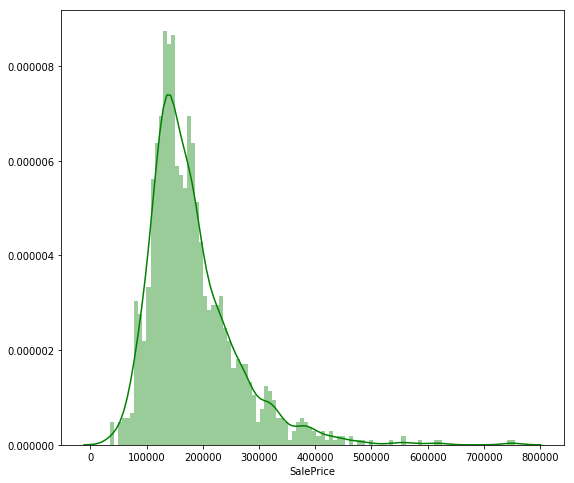

In [199]:
plt.figure(figsize=(9,8))
sns.distplot(df['SalePrice'],color='g',bins=100,hist_kws={'alpha': 0.4})

In [200]:
df['SalePrice'].median()

163000.0

In [201]:
df.describe().columns.shape

(38,)

In [202]:
df_num=df.select_dtypes(include=['float64','int64','float16','int16'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BE65C5DA0>,
      dtype=object)

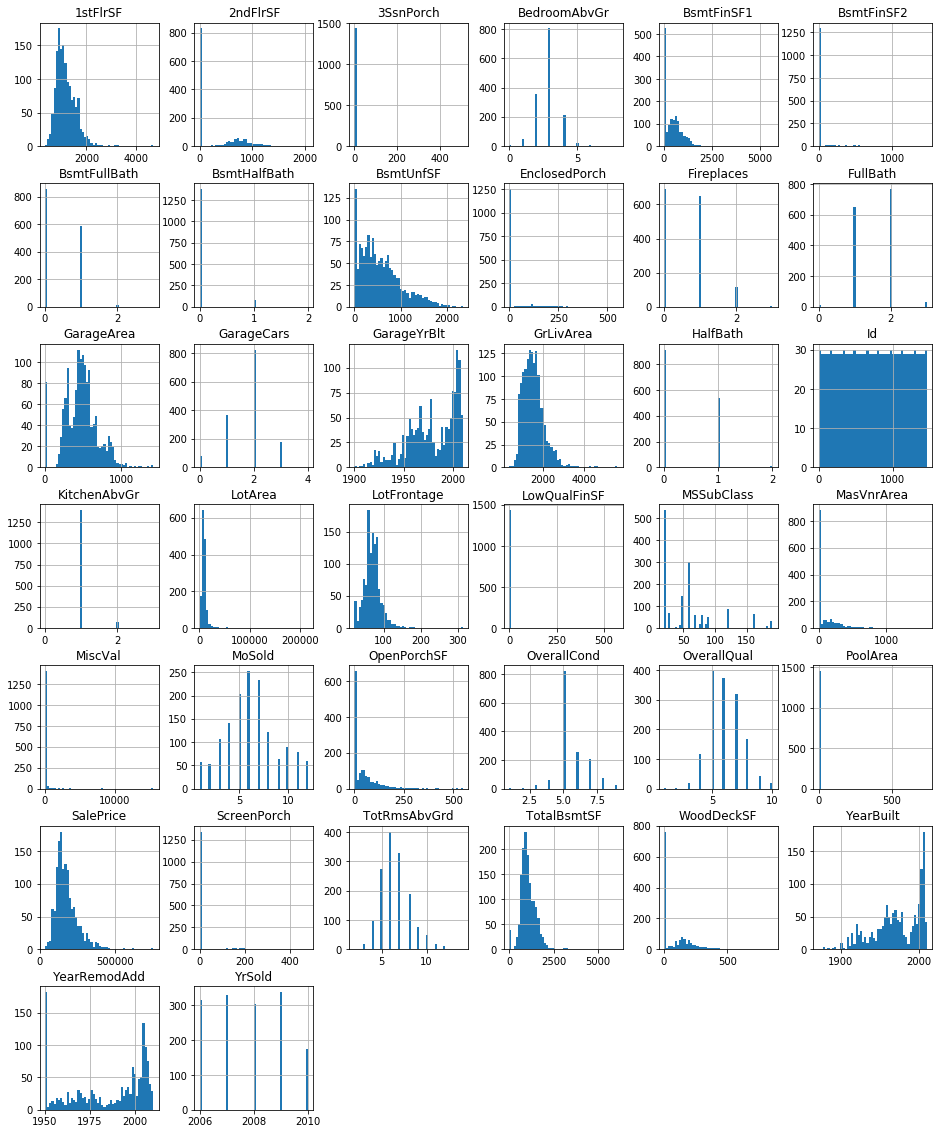

In [203]:
df_num.hist(figsize=(16,20),bins=50)

In [204]:
df_num_corr=df_num.corr()['SalePrice'][:-1]

In [205]:
gloden_features_list=df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending=False)

In [206]:
gloden_features_list # this are the 10 strongly correlated columns with saleprice.

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [207]:
df.shape

(1460, 81)

In [208]:
numerical=df.describe().columns
numerical_cont=[]
numerical_class=[]
for i in df[numerical].columns:
    if df[i].nunique()<8:
        numerical_class.append(i)
    else:
        numerical_cont.append(i)
        
cat=[]
cat_cont=[]
cat_class=[]
for i in df.columns:
    if i not in numerical:
        cat.append(i)


In [209]:
for i in df[cat].columns:
    if df[i].nunique()<8:
        cat_class.append(i)
    else:
        cat_cont.append(i)
    

In [210]:
print(len(numerical),len(numerical_cont),len(numerical_class))
print(len(cat),len(cat_cont),len(cat_class))

38 30 8
43 8 35


In [211]:
for i in numerical_cont:
    df[i].fillna(df[i].median(),inplace=True)
for i in cat_class:
    df[i].fillna(df[i].value_counts().index[0],inplace=True)
for i in numerical_class:
    df[i].fillna(df[i].value_counts().index[0],inplace=True)
for i in cat_cont:
    df[i].fillna(df[i].value_counts().index[0],inplace=True)

In [212]:
df_num.shape

(1460, 38)

In [213]:
len(df_num.columns)

38

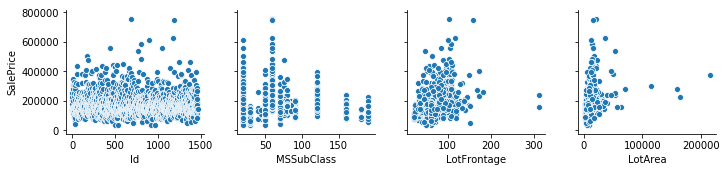

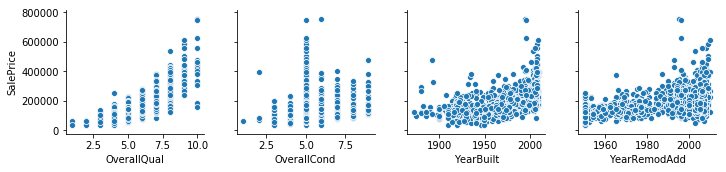

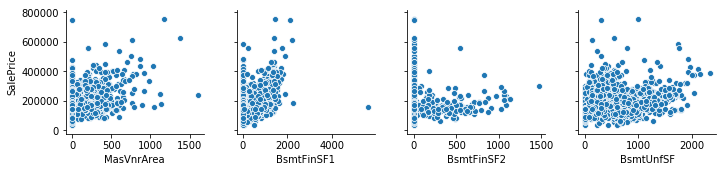

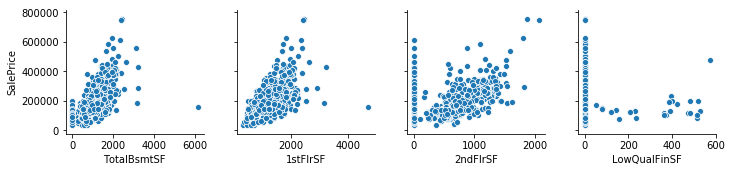

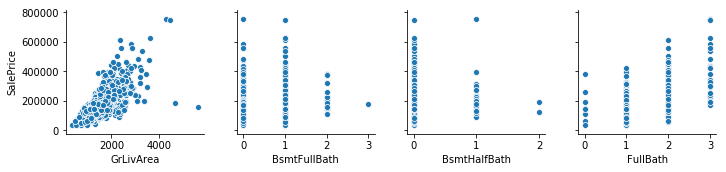

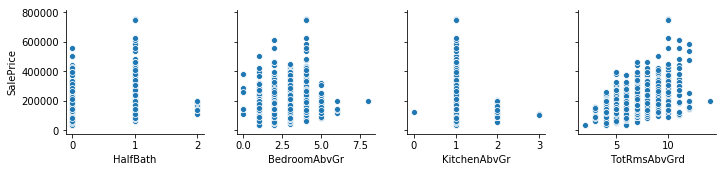

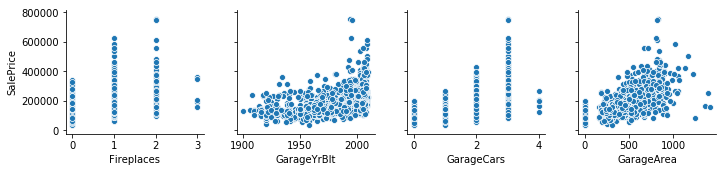

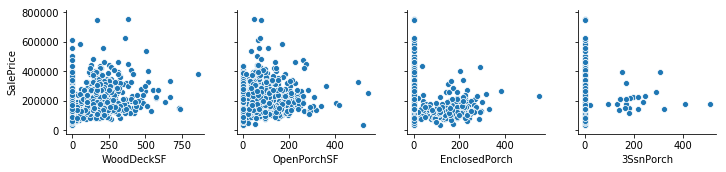

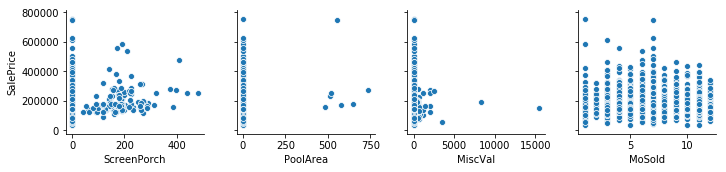

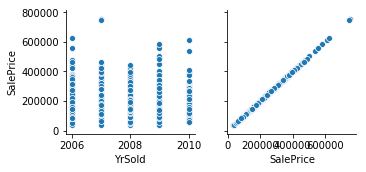

In [214]:
for i in range(0,len(df_num.columns),4):
    sns.pairplot(data=df_num,x_vars=df_num.columns[i:i+4],y_vars=['SalePrice'])

In [215]:
df_num.drop('Id',axis=1,inplace=True)

In [216]:
def outlier_detect(df_num):
    for i in df_num.describe().columns:
        Q1=df_num.describe().at['25%',i]
        Q3=df_num.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df_num[i]=p
    return df

In [217]:
outlier_detect(df_num)

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,1,2008,WD,Normal,118000


In [218]:
df_num_corr=df_num.corr()['SalePrice'][:-1]

In [219]:
gloden_features_list=df_num_corr[abs(df_num_corr)>=0.5].sort_values(ascending=False)

In [220]:
gloden_features_list

OverallQual     0.697877
GrLivArea       0.640551
GarageCars      0.590731
GarageArea      0.581248
YearBuilt       0.556647
FullBath        0.545586
YearRemodAdd    0.525288
TotalBsmtSF     0.519806
Name: SalePrice, dtype: float64

In [222]:
df_num.shape

(1460, 37)

In [231]:
corr=df_num.drop('SalePrice',axis=1).corr()

In [240]:
corr.shape

(36, 36)

In [245]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.224498,-0.240228,0.159099,-0.113781,0.100362,0.096634,0.035538,-0.041045,NaN,...,0.009929,0.046326,0.036215,NaN,NaN,NaN,NaN,NaN,0.050456,-0.019514
LotFrontage,-0.224498,1.000000,0.463160,0.227143,-0.049406,0.173309,0.068010,0.222220,0.109904,NaN,...,0.303039,0.124121,0.120404,NaN,NaN,NaN,NaN,NaN,0.028453,0.011882
LotArea,-0.240228,0.463160,1.000000,0.234299,-0.010044,0.105490,0.074317,0.092218,0.174015,NaN,...,0.318273,0.156114,0.141176,NaN,NaN,NaN,NaN,NaN,0.005780,-0.019429
OverallQual,0.159099,0.227143,0.234299,1.000000,-0.191651,0.590293,0.547444,0.261535,0.199034,NaN,...,0.549320,0.251108,0.373340,NaN,NaN,NaN,NaN,NaN,0.063488,-0.026911
OverallCond,-0.113781,-0.049406,-0.010044,-0.191651,1.000000,-0.337243,-0.106406,-0.112984,-0.027785,NaN,...,-0.177553,-0.054127,-0.144054,NaN,NaN,NaN,NaN,NaN,-0.030962,0.034900
YearBuilt,0.100362,0.173309,0.105490,0.590293,-0.337243,1.000000,0.609123,0.272007,0.237747,NaN,...,0.486435,0.267271,0.317066,NaN,NaN,NaN,NaN,NaN,0.016737,-0.010039
YearRemodAdd,0.096634,0.068010,0.074317,0.547444,-0.106406,0.609123,1.000000,0.116229,0.118729,NaN,...,0.372202,0.251056,0.303280,NaN,NaN,NaN,NaN,NaN,0.021490,0.035743
MasVnrArea,0.035538,0.222220,0.092218,0.261535,-0.112984,0.272007,0.116229,1.000000,0.161302,NaN,...,0.267671,0.124844,0.113874,NaN,NaN,NaN,NaN,NaN,0.050557,0.006111
BsmtFinSF1,-0.041045,0.109904,0.174015,0.199034,-0.027785,0.237747,0.118729,0.161302,1.000000,NaN,...,0.257538,0.189787,0.068251,NaN,NaN,NaN,NaN,NaN,-0.002159,0.015512
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


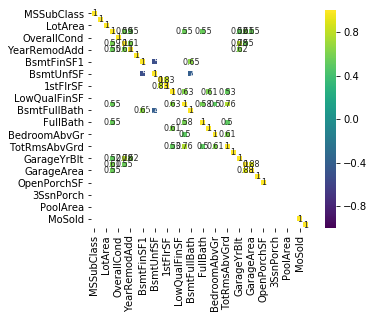

In [242]:
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [246]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']